In [1]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

2024-04-29 18:23:31.385059: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [4]:
IMG_SIZE=28
NUM_EXAMPLES_TRAIN = np.shape(x_train)[0]
NUM_EXAMPLES_TEST = np.shape(x_test)[0]
x_train_con = np.array(x_train).reshape(NUM_EXAMPLES_TRAIN, IMG_SIZE, IMG_SIZE, 1)
x_test_con = np.array(x_test).reshape(NUM_EXAMPLES_TEST, IMG_SIZE, IMG_SIZE, 1)
print(f"Training data dimension: {np.shape(x_train_con)}")
print(f"Test data dimension: {np.shape(x_test_con)}")

Training data dimension: (60000, 28, 28, 1)
Test data dimension: (10000, 28, 28, 1)


In [5]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape = x_train_con.shape[1:])) #skipping training dataset size using [1:]
model_1.add(BatchNormalization())
model_1.add(Conv2D(32,kernel_size=3,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))


model_1.add(Conv2D(64,kernel_size=3,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,kernel_size=3,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

2024-04-29 18:23:34.664716: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-29 18:23:34.665817: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-04-29 18:23:34.699493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-29 18:23:34.699643: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 960 computeCapability: 5.2
coreClock: 1.2785GHz coreCount: 8 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.46GiB/s
2024-04-29 18:23:34.699660: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-29 18:23:34.701258: I tensorflow/stream_executor/platform/def

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [7]:
model_1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [8]:
history = model_1.fit(x_train_con, y_train, epochs = 35, validation_split = 0.2, batch_size=32)

2024-04-29 18:23:39.892704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-29 18:23:39.893130: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz


Epoch 1/35


2024-04-29 18:23:40.624420: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-29 18:23:40.778465: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


1500/1500 [==============================] - 13s 8ms/step - loss: 0.4587 - accuracy: 0.8614 - val_loss: 0.0588 - val_accuracy: 0.9828
Epoch 2/35
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0826 - accuracy: 0.9751 - val_loss: 0.0465 - val_accuracy: 0.9859
Epoch 3/35
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0595 - accuracy: 0.9811 - val_loss: 0.0483 - val_accuracy: 0.9849
Epoch 4/35
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0576 - accuracy: 0.9819 - val_loss: 0.0431 - val_accuracy: 0.9884
Epoch 5/35
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0313 - val_accuracy: 0.9899
Epoch 6/35
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 7/35
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0602 - val_accuracy: 0.9

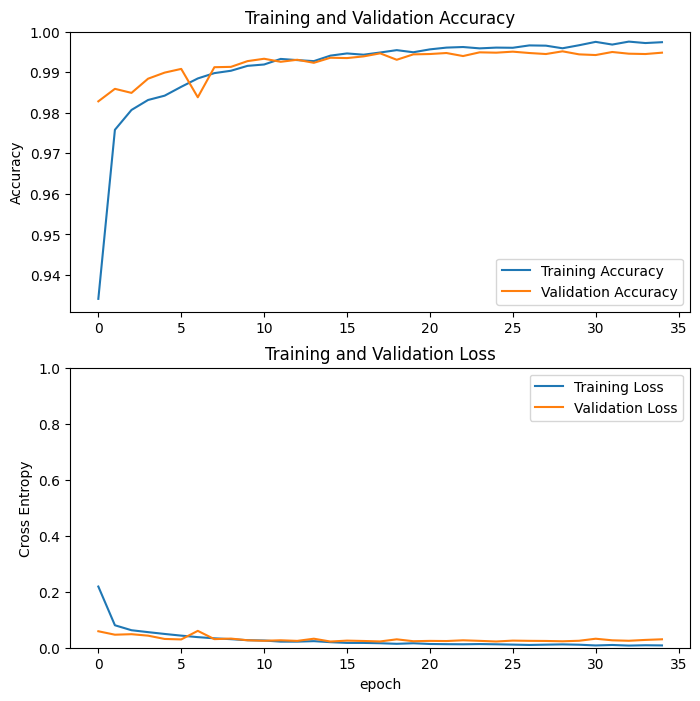

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Save model so you don't have to do it each time you open notebook

In [ ]:
model_1.save()